In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import extract

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Getting the last id value of the records, dates on Aug 23rd, 2017
last_record = session.query(Measurement.date, Measurement.id).order_by(Measurement.id.desc()).first()
last_record

('2017-08-23', 19550)

In [14]:
# Getting the first id value of the records, exactly 12 months before the last day of the record which is Aug 23rd, 2017
start_record = session.query(Measurement.id).filter(extract('year', Measurement.date) == 2016).filter(extract('month', Measurement.date)==8).filter(extract('day', Measurement.date)==23).all()
start_record

[(2364), (5091), (7331), (8825), (11851), (14608), (19202)]

In [15]:
engine.execute('SELECT * FROM measurement LIMIT 100').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
# Calculate the date 1 year ago from the last data point in the database
# Sort the dataframe by date - which was not necessary since I had queried the range in the order already.
tw_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.id <= 19550).filter(Measurement.id >= 19202).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_date = pd.DataFrame([(t.date, t.prcp) for t in tw_data], columns=['Date', 'Precipitation'])
df_date.head()

# Use Pandas Plotting with Matplotlib to plot the data
# Data Clean Up by removing NaN values
df_date_f = df_date.dropna()
df_date_f

,Date,Precipitation
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
4,2016-08-28,2.07
5,2016-08-29,0.90
6,2016-08-30,0.05
7,2016-08-31,2.46
8,2016-09-01,0.01
9,2016-09-02,0.03
10,2016-09-03,1.00


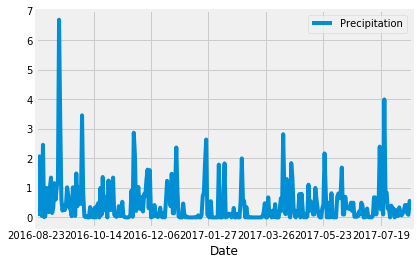

In [113]:
df_date_f.plot(x='Date', y='Precipitation')

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_stats = df_date_f.describe()
df_stats

,Precipitation
count,328.000000
mean,0.450640
std,0.717174
min,0.000000
25%,0.010000
50%,0.190000
75%,0.610000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
query_count_station = session.query(Station).count()
query_count_station

9

In [21]:
station_info = session.query(Station.station, Station.name).all()
station_info

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [49]:
# Determine the max count of station within the Measurement Table
max_rows = session.query(func.count(Measurement.station)).scalar()
max_rows

19550

In [76]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
row_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
row_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
statistic_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
statistic_active_station

[(54.0, 85.0, 71.66378066378067)]

In [95]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obs_active_station = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).all()
obs_active_station

[(14959, 'USC00519281', '2017-08-18', 79.0),
 (14958, 'USC00519281', '2017-08-17', 76.0),
 (14957, 'USC00519281', '2017-08-16', 76.0),
 (14956, 'USC00519281', '2017-08-15', 77.0),
 (14955, 'USC00519281', '2017-08-14', 77.0),
 (14954, 'USC00519281', '2017-08-13', 77.0),
 (14953, 'USC00519281', '2017-08-06', 83.0),
 (14952, 'USC00519281', '2017-08-05', 82.0),
 (14951, 'USC00519281', '2017-08-04', 77.0),
 (14950, 'USC00519281', '2017-07-31', 76.0),
 (14949, 'USC00519281', '2017-07-30', 81.0),
 (14948, 'USC00519281', '2017-07-29', 82.0),
 (14947, 'USC00519281', '2017-07-28', 81.0),
 (14946, 'USC00519281', '2017-07-27', 76.0),
 (14945, 'USC00519281', '2017-07-26', 75.0),
 (14944, 'USC00519281', '2017-07-25', 77.0),
 (14943, 'USC00519281', '2017-07-24', 75.0),
 (14942, 'USC00519281', '2017-07-23', 82.0),
 (14941, 'USC00519281', '2017-07-22', 77.0),
 (14940, 'USC00519281', '2017-07-21', 77.0),
 (14939, 'USC00519281', '2017-07-20', 77.0),
 (14938, 'USC00519281', '2017-07-19', 76.0),
 (14937, '

In [96]:
active_station_data = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.id <= 14959).filter(Measurement.id >= 14603).all()
active_station_data

[(14603, 'USC00519281', '2016-08-18', 80.0),
 (14604, 'USC00519281', '2016-08-19', 79.0),
 (14605, 'USC00519281', '2016-08-20', 81.0),
 (14606, 'USC00519281', '2016-08-21', 79.0),
 (14607, 'USC00519281', '2016-08-22', 78.0),
 (14608, 'USC00519281', '2016-08-23', 77.0),
 (14609, 'USC00519281', '2016-08-24', 77.0),
 (14610, 'USC00519281', '2016-08-25', 80.0),
 (14611, 'USC00519281', '2016-08-26', 80.0),
 (14612, 'USC00519281', '2016-08-27', 75.0),
 (14613, 'USC00519281', '2016-08-28', 73.0),
 (14614, 'USC00519281', '2016-08-29', 78.0),
 (14615, 'USC00519281', '2016-08-30', 77.0),
 (14616, 'USC00519281', '2016-08-31', 78.0),
 (14617, 'USC00519281', '2016-09-01', 80.0),
 (14618, 'USC00519281', '2016-09-02', 80.0),
 (14619, 'USC00519281', '2016-09-03', 78.0),
 (14620, 'USC00519281', '2016-09-04', 78.0),
 (14621, 'USC00519281', '2016-09-05', 78.0),
 (14622, 'USC00519281', '2016-09-06', 73.0),
 (14623, 'USC00519281', '2016-09-07', 74.0),
 (14624, 'USC00519281', '2016-09-08', 80.0),
 (14625, '

In [99]:
df_active_station = pd.DataFrame([(m.tobs) for m in active_station_data], columns=['Temperature'])
df_active_station.head()

,Temperature
0,80.0
1,79.0
2,81.0
3,79.0
4,78.0


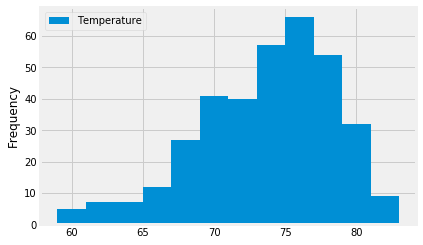

In [100]:
df_active_station.plot.hist(bins=12)

In [101]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [103]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
temps_query = calc_temps('2016-08-18', '2017-08-18')
temps_query

[(58.0, 74.59875167186803, 87.0)]

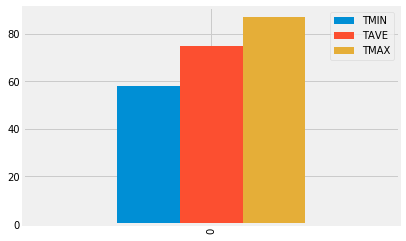

In [111]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df_temps = pd.DataFrame(temps_query, columns=['TMIN', 'TAVE', 'TMAX'])
df_temps.plot.bar()

In [130]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def calc_temps(start_date, end_date):
    return session.query(Measurement, func.sum(Measurement.prcp), Station).\
    join(Station).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
station_query = calc_temps('2016-08-18', '2017-08-18')
station_query

InvalidRequestError: Don't know how to join to <class 'sqlalchemy.ext.automap.station'>; please use an ON clause to more clearly establish the left side of this join

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
